# Data Preprocessing

## Import Libraries

In [ ]:
# !pip install scikit-learn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('beer-servings.csv')

## Inspect Data

In [ ]:
data.shape

(193, 7)

In [ ]:
data.head(2)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe


In [ ]:
data = data.iloc[:, 1:]

In [ ]:
data.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe


## Dropping Duplicate Rows if Any

In [ ]:
duplicated_rows = data.duplicated()

In [ ]:
print(duplicated_rows.sum())

0


In [ ]:
# Code snippet to select non duplicate rows
# data = data[~duplicated_rows]

# OR
data.drop_duplicates(inplace=True)

# data = data.drop_duplicates()

In [ ]:
data.shape

(193, 6)

## Checking missing values

In [ ]:
data.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


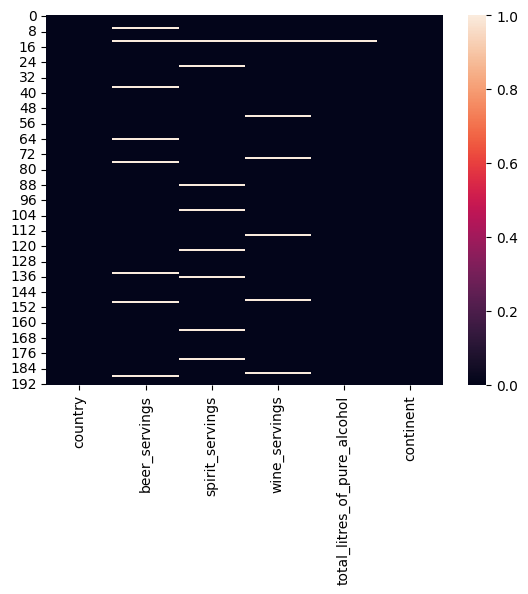

In [ ]:
sns.heatmap(data.isna())
plt.show()

In [ ]:
data.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [ ]:
data.isna().sum()/data.shape[0]*100

,0
country,0.000000
beer_servings,4.145078
spirit_servings,4.145078
wine_servings,3.108808
total_litres_of_pure_alcohol,0.518135
continent,0.000000


### Dropping Rows with missing values


*   This can be done where there is alot of data points available and few rows having missing value




In [ ]:
# data = data.dropna() # Default inplace=False
# data.dropna(inplace=True)

In [ ]:
# Define in which columns to look for NA values
# data.dropna(subset=["beer_servings", "wine_servings"])
# data.dropna(subset=["beer_servings", "wine_servings"], inplace=True)
# data

# Handling missing values

### Splitting Numerical and Categorical Columns

In [ ]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")

In [ ]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("Categorical columns are")
print(cat_cols)

Numerical columns are
['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
Categorical columns are
['country', 'continent']


## Check histograms of numerical columns for data imputation

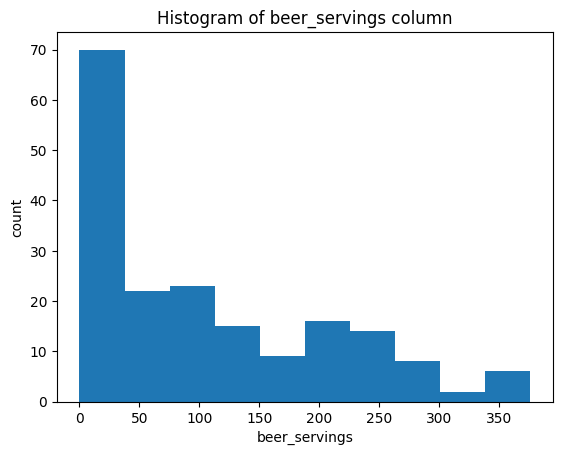

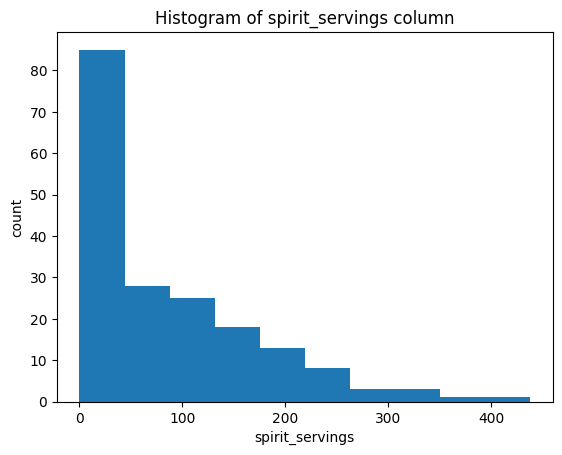

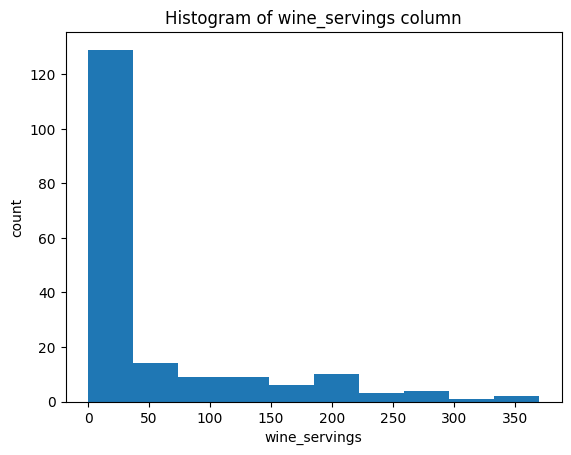

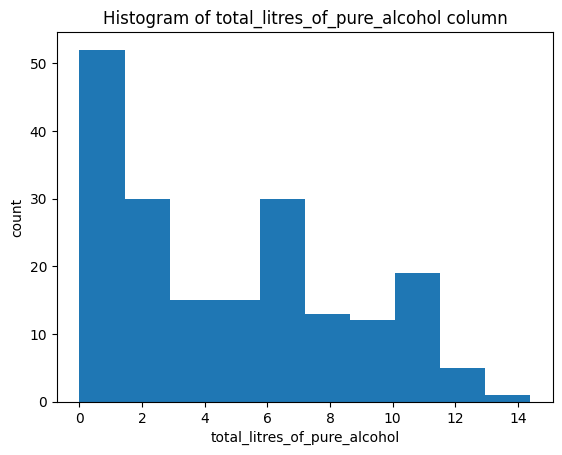

In [ ]:
for col in num_cols:
  plt.hist(num_df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

## Filling missing values for numerical columns

In [ ]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [ ]:
# Sanity check to see if missing values are filled
num_df.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


## Filling missing values for categorical columns

In [ ]:
# for col in cat_cols:
#     print(cat_df[col].mode())

In [ ]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [ ]:
# Sanity check to see if missing values are filled
cat_df.isna().sum()

,0
country,0
continent,0


## Recombine both Numerical and Categorical Columns

In [ ]:
data = pd.concat([num_df, cat_df], axis=1)

In [ ]:
data.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
country,0
continent,0


# Checking Duplicate Columns

In [ ]:
dup_cols = data.columns.duplicated()

# Remove duplicate columns if any
data = data.loc[:, ~dup_cols]

## Checking Duplicate Columns Visually

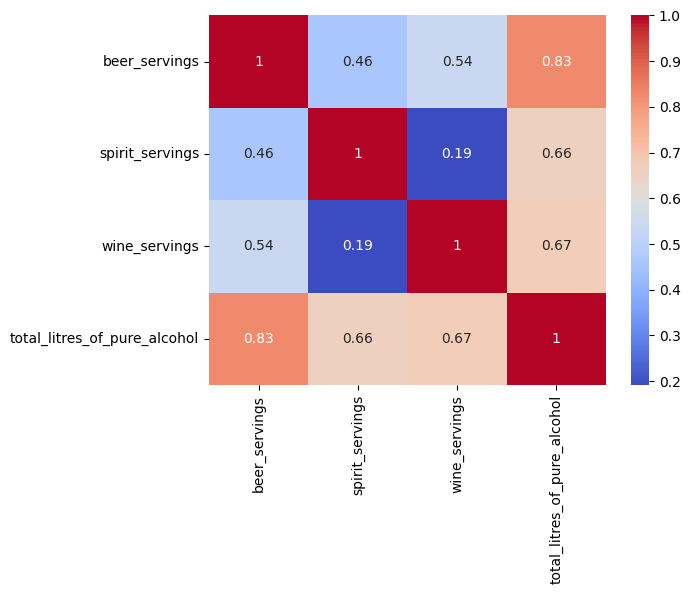

In [ ]:
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Outlier Handling

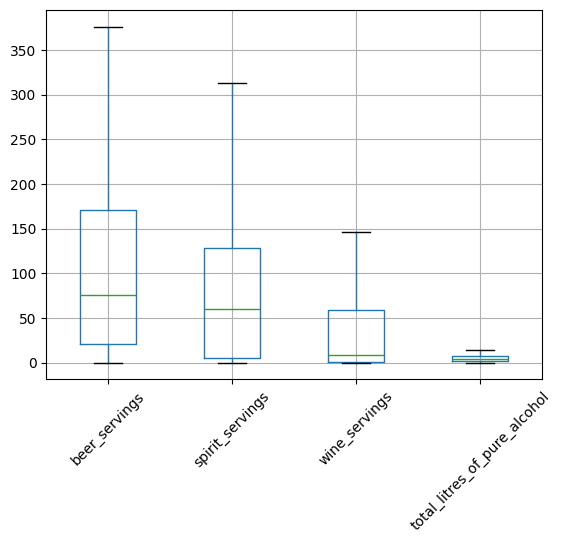

In [ ]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [ ]:
for col in num_cols:
  num_df[col] = remove_outliers(num_df, col)

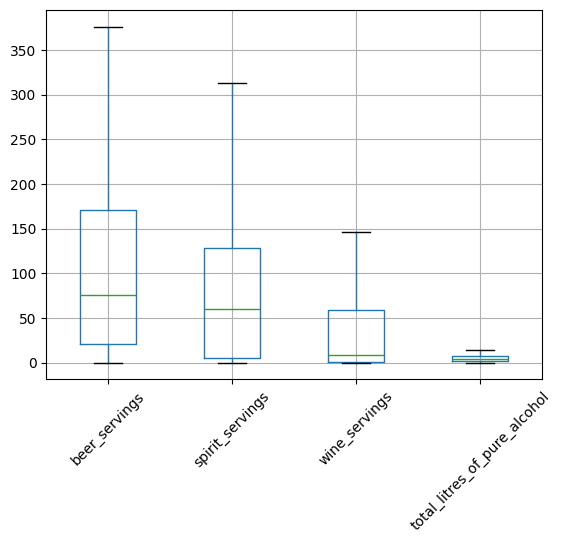

In [ ]:
# plt.boxplot(num_df)
# plt.show()

num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
data = pd.concat([num_df, cat_df], axis=1)

# Checking Data Imbalance

In [ ]:
data['continent'].value_counts()

,count
continent,
Africa,53
Europe,45
Asia,44
North America,23
Oceania,16
South America,12


## Plot Class imbalance

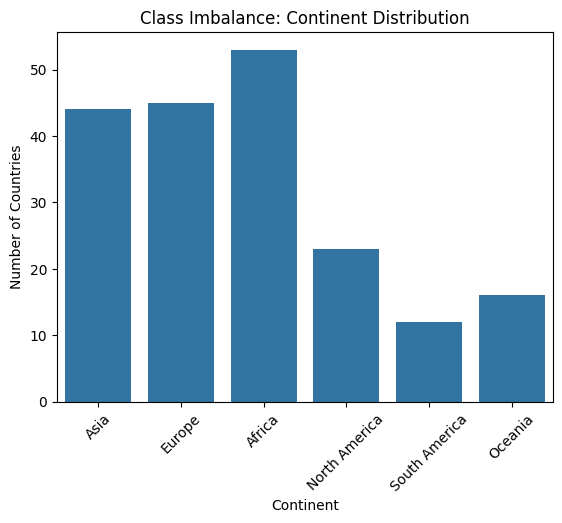

In [ ]:
sns.countplot(x='continent', data=data)
plt.title('Class Imbalance: Continent Distribution')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = data.drop('continent', axis=1)
y = data['continent']


oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# OR Undersampling
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

continent
Asia             53
Europe           53
Africa           53
North America    53
South America    53
Oceania          53
Name: count, dtype: int64


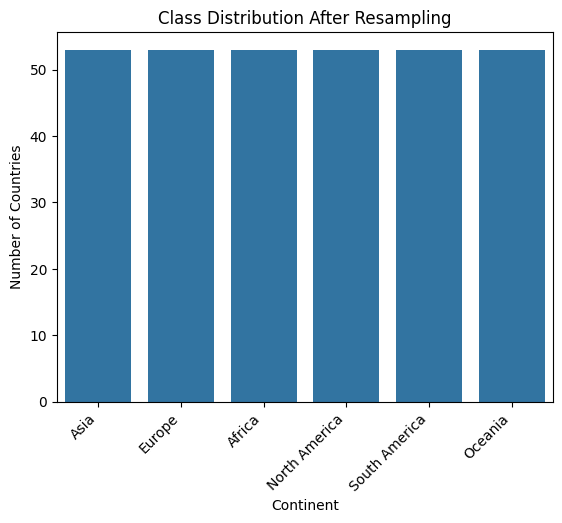

In [ ]:
# Create a new balanced DataFrame
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['continent'] = y_resampled

# Check the class distribution after resampling
print(balanced_data['continent'].value_counts())


sns.countplot(x='continent', data=balanced_data)
plt.title('Class Distribution After Resampling')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.show()

# Separate Features and Labels

In [ ]:
y = data["wine_servings"]
X = data.drop("wine_servings", axis=1)

# Train-Test Split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train

,country,beer_servings,spirit_servings,total_litres_of_pure_alcohol,continent
92,Laos,62.0,0.0,6.2,Asia
173,Tonga,36.0,21.0,1.1,Oceania
41,Costa Rica,149.0,87.0,4.4,North America
64,Georgia,NaN,100.0,5.4,Europe
109,Mexico,238.0,68.0,5.5,North America
...,...,...,...,...,...
43,Cuba,93.0,137.0,4.2,North America
22,Botswana,173.0,35.0,5.4,Africa
72,Guyana,93.0,302.0,7.1,South America
15,Belarus,142.0,373.0,14.4,Europe
